In [4]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


C:\Users\irina\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# - расчетное потребление энергии в мегаваттах (МВт) в часах

In [5]:
df = pd.read_csv('DUQ_hourly.csv', index_col=['Datetime'], parse_dates=['Datetime'], dayfirst=True)

In [55]:
df.head(10)

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0
2005-12-31 06:00:00,1372.0
2005-12-31 07:00:00,1402.0
2005-12-31 08:00:00,1425.0
2005-12-31 09:00:00,1502.0


### Стабилизация дисперсии

<Figure size 1080x504 with 0 Axes>

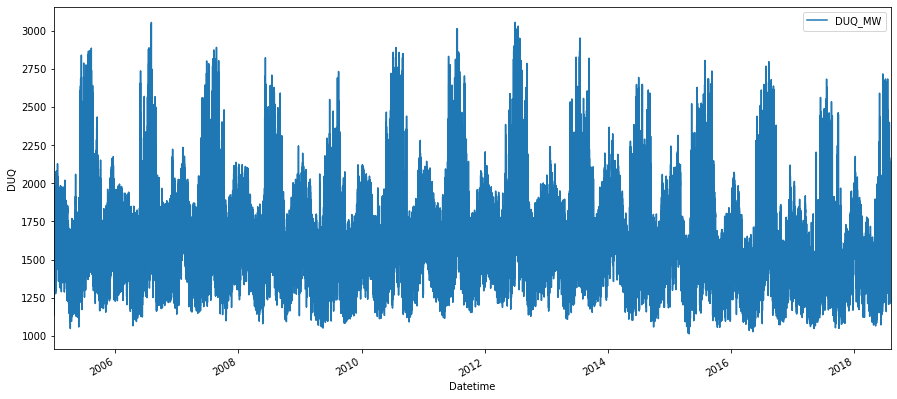

In [56]:
plt.figure(figsize(15,7))
df.plot()
plt.ylabel('DUQ')
pylab.show()

Оптимальный параметр преобразования Кокса- Бокса: -0.598401
 Критерий Дики-Фуллера: p=0.000000


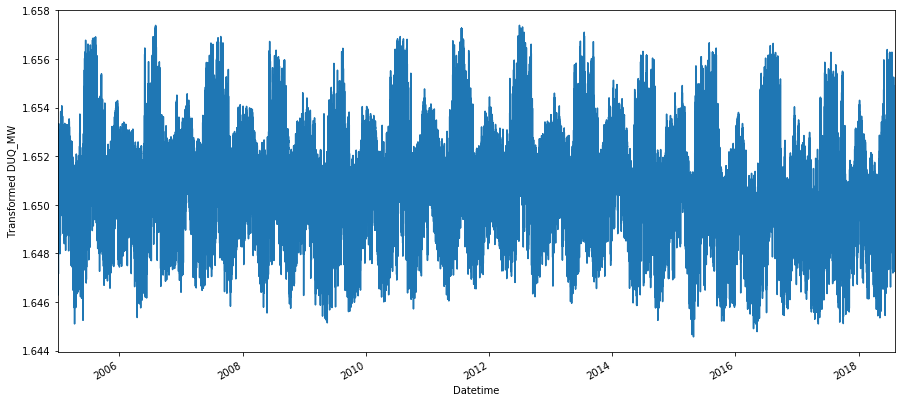

In [57]:
df['DUQ_box'], lmbda = stats.boxcox(df.DUQ_MW)
plt.figure(figsize(15,7))
df.DUQ_box.plot()
plt.ylabel(u'Transformed DUQ_MW')
print("Оптимальный параметр преобразования Кокса- Бокса: %f" % lmbda)
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df.DUQ_box)[1])

### —Стационарность

 Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

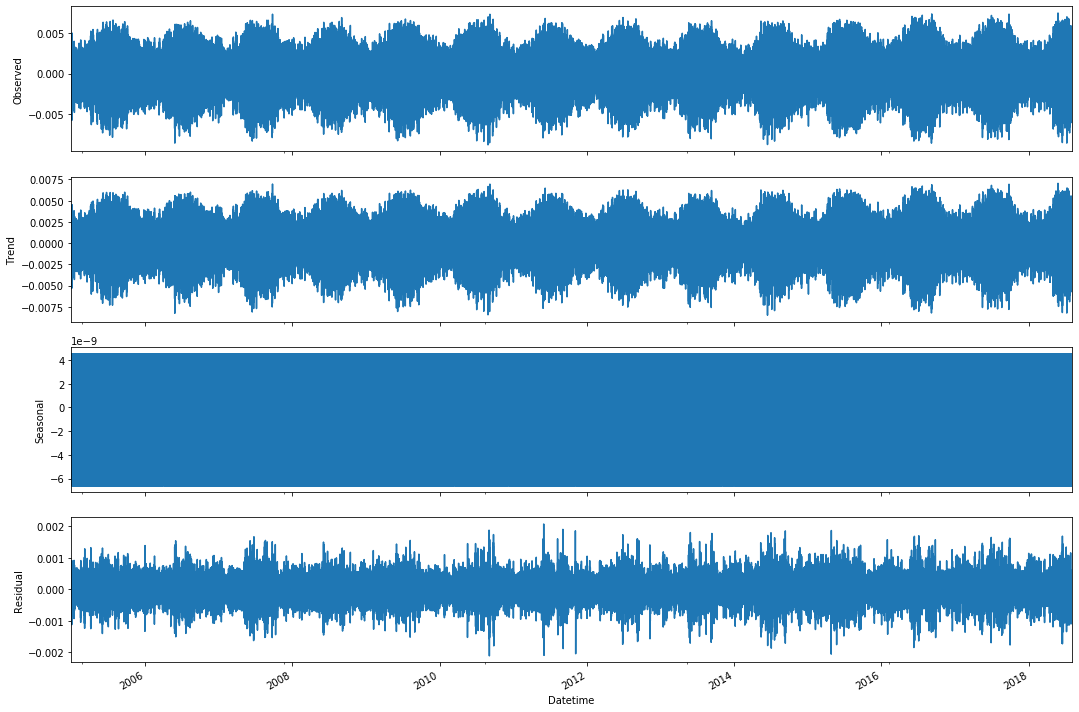

In [58]:
df['DUQ_box_diff'] = df.DUQ_box - df.DUQ_box.shift(12)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['DUQ_box_diff'][12:],freq=4).plot()
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df.DUQ_box_diff[12:])[1])

### Преобразование по дням

In [63]:
df = pd.read_csv('./DUQ_hourly.csv')
df["Datetime"] = pd.to_datetime(df["Datetime"])
df['date'] = df["Datetime"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["date"],inplace=True)
df

,Datetime,DUQ_MW,date
date,,,
2005-12-31,2005-12-31 01:00:00,1458.0,2005-12-31
2005-12-31,2005-12-31 02:00:00,1377.0,2005-12-31
2005-12-31,2005-12-31 03:00:00,1351.0,2005-12-31
2005-12-31,2005-12-31 04:00:00,1336.0,2005-12-31
2005-12-31,2005-12-31 05:00:00,1356.0,2005-12-31
...,...,...,...
2018-01-01,2018-01-01 20:00:00,1962.0,2018-01-01
2018-01-01,2018-01-01 21:00:00,1940.0,2018-01-01
2018-01-01,2018-01-01 22:00:00,1891.0,2018-01-01


In [64]:
df = df.resample('D', on = 'date').sum()
df

,DUQ_MW
date,
2005-01-01,31111.0
2005-01-02,32958.0
2005-01-03,37991.0
2005-01-04,38658.0
2005-01-05,41064.0
...,...
2018-07-30,40457.0
2018-07-31,41635.0
2018-08-01,41793.0


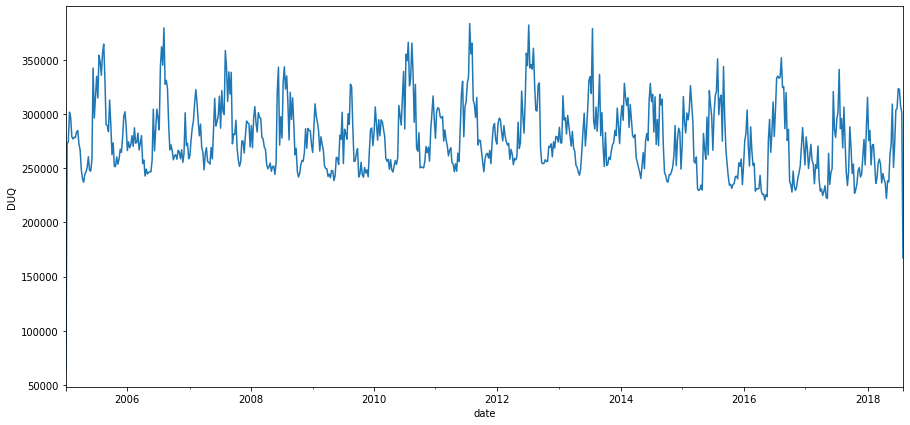

 Критерий Дики-Фуллера: p=0.000000


In [81]:
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel('DUQ')
pylab.show()
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['DUQ_MW'])[1])

### Преобразование по неделям

In [66]:
df = pd.read_csv('./DUQ_hourly.csv')
df["Datetime"] = pd.to_datetime(df["Datetime"])
df['date'] = df["Datetime"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["date"],inplace=True)
df

,Datetime,DUQ_MW,date
date,,,
2005-12-31,2005-12-31 01:00:00,1458.0,2005-12-31
2005-12-31,2005-12-31 02:00:00,1377.0,2005-12-31
2005-12-31,2005-12-31 03:00:00,1351.0,2005-12-31
2005-12-31,2005-12-31 04:00:00,1336.0,2005-12-31
2005-12-31,2005-12-31 05:00:00,1356.0,2005-12-31
...,...,...,...
2018-01-01,2018-01-01 20:00:00,1962.0,2018-01-01
2018-01-01,2018-01-01 21:00:00,1940.0,2018-01-01
2018-01-01,2018-01-01 22:00:00,1891.0,2018-01-01


In [68]:
df = df.resample('W', on = 'date').sum()
df

,DUQ_MW
date,
2005-01-02,64069.0
2005-01-09,273052.0
2005-01-16,274529.0
2005-01-23,301980.0
2005-01-30,297042.0
...,...
2018-07-08,323737.0
2018-07-15,322957.0
2018-07-22,307617.0


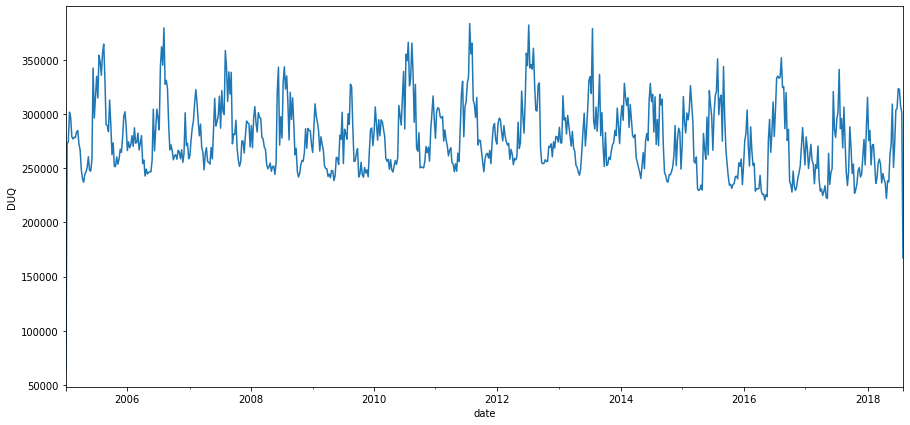

 Критерий Дики-Фуллера: p=0.000000


In [80]:
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel('DUQ')
pylab.show()
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['DUQ_MW'])[1])

### Преобразование по месяцам

In [70]:
df = pd.read_csv('./DUQ_hourly.csv')
df["Datetime"] = pd.to_datetime(df["Datetime"])

In [71]:
df['date'] = df["Datetime"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["date"],inplace=True)
df

,Datetime,DUQ_MW,date
date,,,
2005-12-31,2005-12-31 01:00:00,1458.0,2005-12-31
2005-12-31,2005-12-31 02:00:00,1377.0,2005-12-31
2005-12-31,2005-12-31 03:00:00,1351.0,2005-12-31
2005-12-31,2005-12-31 04:00:00,1336.0,2005-12-31
2005-12-31,2005-12-31 05:00:00,1356.0,2005-12-31
...,...,...,...
2018-01-01,2018-01-01 20:00:00,1962.0,2018-01-01
2018-01-01,2018-01-01 21:00:00,1940.0,2018-01-01
2018-01-01,2018-01-01 22:00:00,1891.0,2018-01-01


In [73]:
df = df.resample('D', on = 'date').sum()
df

,DUQ_MW
date,
2005-01-01,31111.0
2005-01-02,32958.0
2005-01-03,37991.0
2005-01-04,38658.0
2005-01-05,41064.0
...,...
2018-07-30,40457.0
2018-07-31,41635.0
2018-08-01,41793.0


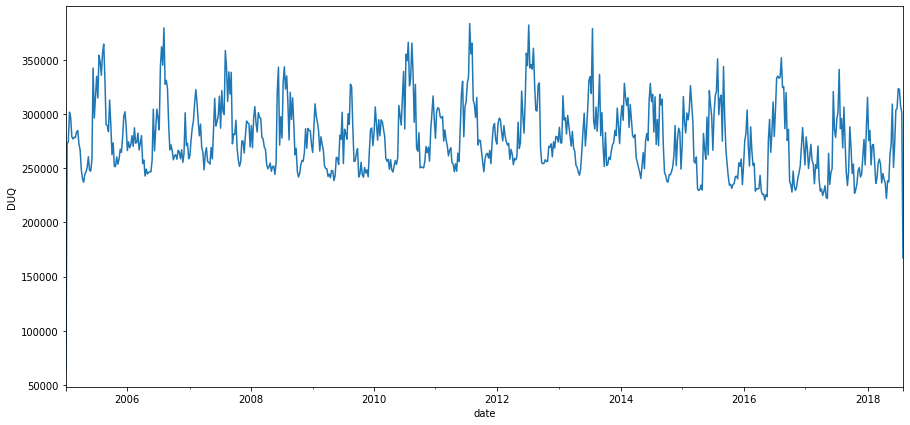

 Критерий Дики-Фуллера: p=0.000000


In [79]:
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel('DUQ')
pylab.show()
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['DUQ_MW'])[1])

### Преобразование по неделям

In [76]:
df = pd.read_csv('./DUQ_hourly.csv')
df["Datetime"] = pd.to_datetime(df["Datetime"])
df['date'] = df["Datetime"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["date"],inplace=True)
df

,Datetime,DUQ_MW,date
date,,,
2005-12-31,2005-12-31 01:00:00,1458.0,2005-12-31
2005-12-31,2005-12-31 02:00:00,1377.0,2005-12-31
2005-12-31,2005-12-31 03:00:00,1351.0,2005-12-31
2005-12-31,2005-12-31 04:00:00,1336.0,2005-12-31
2005-12-31,2005-12-31 05:00:00,1356.0,2005-12-31
...,...,...,...
2018-01-01,2018-01-01 20:00:00,1962.0,2018-01-01
2018-01-01,2018-01-01 21:00:00,1940.0,2018-01-01
2018-01-01,2018-01-01 22:00:00,1891.0,2018-01-01


In [78]:
df = df.resample('W', on = 'date').sum()
df

,DUQ_MW
date,
2005-01-02,64069.0
2005-01-09,273052.0
2005-01-16,274529.0
2005-01-23,301980.0
2005-01-30,297042.0
...,...
2018-07-08,323737.0
2018-07-15,322957.0
2018-07-22,307617.0


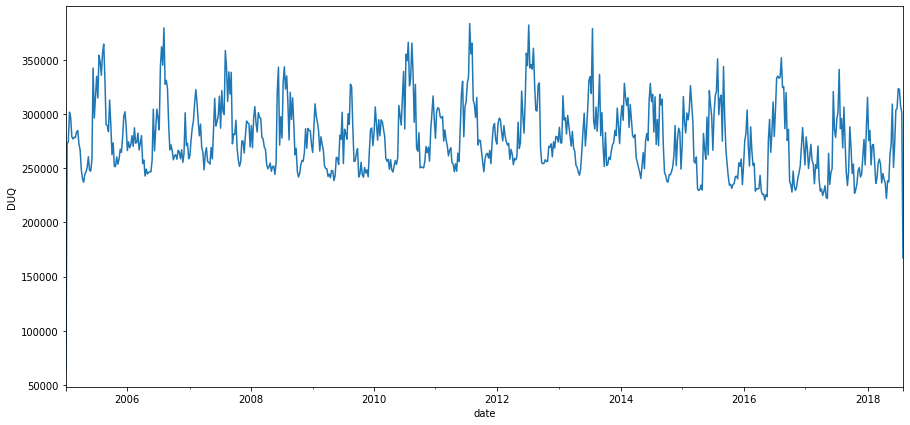

 Критерий Дики-Фуллера: p=0.000000


In [82]:
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel('DUQ')
pylab.show()
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['DUQ_MW'])[1])

###  Преобразование по месяцам 

In [83]:
df = pd.read_csv('./DUQ_hourly.csv')
df["Datetime"] = pd.to_datetime(df["Datetime"])
df['date'] = df["Datetime"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["date"],inplace=True)
df

,Datetime,DUQ_MW,date
date,,,
2005-12-31,2005-12-31 01:00:00,1458.0,2005-12-31
2005-12-31,2005-12-31 02:00:00,1377.0,2005-12-31
2005-12-31,2005-12-31 03:00:00,1351.0,2005-12-31
2005-12-31,2005-12-31 04:00:00,1336.0,2005-12-31
2005-12-31,2005-12-31 05:00:00,1356.0,2005-12-31
...,...,...,...
2018-01-01,2018-01-01 20:00:00,1962.0,2018-01-01
2018-01-01,2018-01-01 21:00:00,1940.0,2018-01-01
2018-01-01,2018-01-01 22:00:00,1891.0,2018-01-01


In [84]:
df = df.resample('M', on = 'date').sum()
df

,DUQ_MW
date,
2005-01-31,1252603.0
2005-02-28,1113277.0
2005-03-31,1215163.0
2005-04-30,1037920.0
2005-05-31,1106793.0
...,...
2018-04-30,1008305.0
2018-05-31,1166120.0
2018-06-30,1203606.0


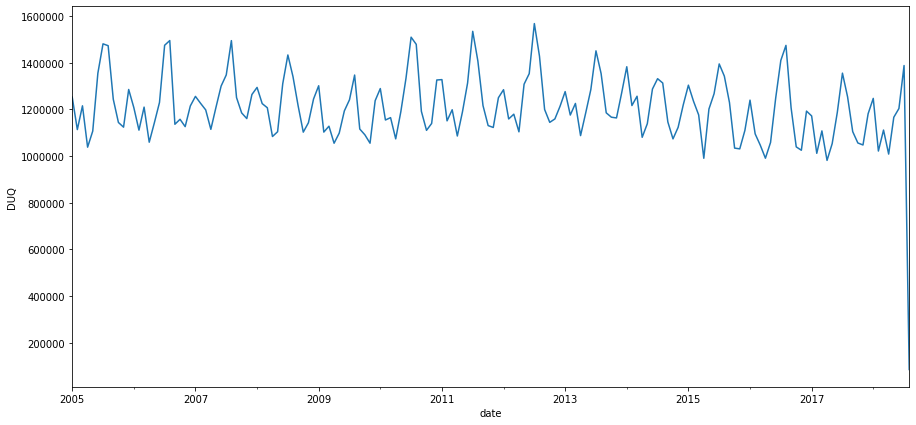

 Критерий Дики-Фуллера: p=0.989844


In [85]:
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel('DUQ')
pylab.show()
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['DUQ_MW'])[1])

### Преобразование по годам

In [86]:
df = pd.read_csv('./DUQ_hourly.csv')
df["Datetime"] = pd.to_datetime(df["Datetime"])
df['date'] = df["Datetime"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["date"],inplace=True)
df

,Datetime,DUQ_MW,date
date,,,
2005-12-31,2005-12-31 01:00:00,1458.0,2005-12-31
2005-12-31,2005-12-31 02:00:00,1377.0,2005-12-31
2005-12-31,2005-12-31 03:00:00,1351.0,2005-12-31
2005-12-31,2005-12-31 04:00:00,1336.0,2005-12-31
2005-12-31,2005-12-31 05:00:00,1356.0,2005-12-31
...,...,...,...
2018-01-01,2018-01-01 20:00:00,1962.0,2018-01-01
2018-01-01,2018-01-01 21:00:00,1940.0,2018-01-01
2018-01-01,2018-01-01 22:00:00,1891.0,2018-01-01


In [87]:
df = df.resample('Y', on = 'date').sum()
df

,DUQ_MW
date,
2005-12-31,14830490.0
2006-12-31,14562752.0
2007-12-31,15003675.0
2008-12-31,14699758.0
2009-12-31,13964771.0
2010-12-31,14959342.0
2011-12-31,14925032.0
2012-12-31,15097835.0
2013-12-31,14822887.0


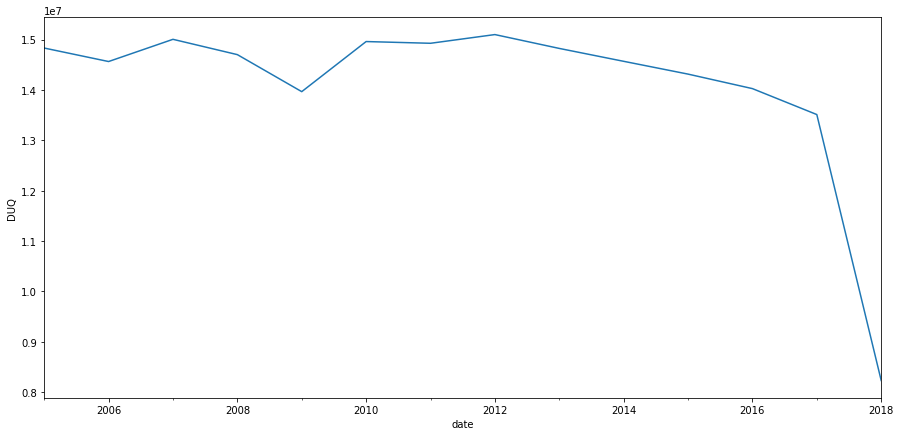

 Критерий Дики-Фуллера: p=0.998716


In [88]:
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel('DUQ')
pylab.show()
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['DUQ_MW'])[1])

1. Графики относительно часов, дней и недель больше походят на стационарные, критерий дики-фуллера также отвергает гипотезу о нестационарности. 
2. Графики относительно месяцев выглядят хорошо для определения на глаз, не виден тренд, график выглядит стационарным, но критерий этого не подтверждает, нужно выполнить методы по уменьшению разброса и улучшению критерия Дики-Фуллера
3. Графики относительно годов не выглядит стационарным, виден убывающий тренд, критерий подтверждает на цифрах визуальные данные
Исходя из иследований, преобразование по дням, неделям и часам стационары, критерий Дики-Фуллера это подтверждает.Преобразование по месяцам стационарен (похож), критерий отвергает это предположение,нужны преобразования.Года не стационары,кр

# Обчуение временного ряда

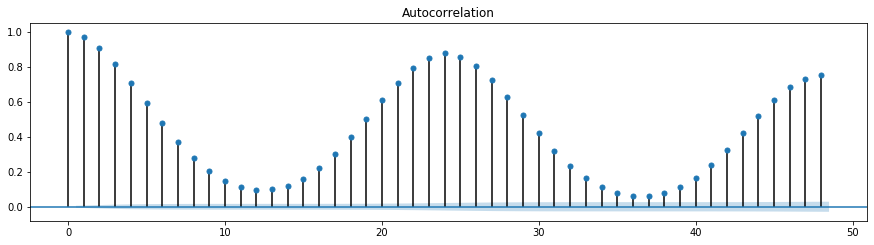

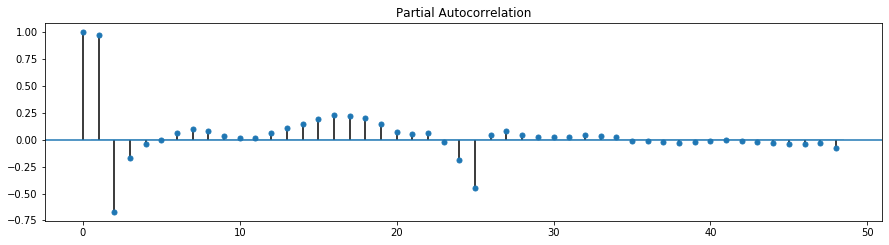

In [6]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['DUQ_MW'][13:].values.squeeze(), lags=48, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['DUQ_MW'][13:].values.squeeze(), lags=48, ax=ax)
pylab.show()

In [7]:
#номер последнего значимого сезонного лага Q = 4
Qs = range(0, 5)
#номер не сезонного значимого лага q = 11
qs = range(0, 12)
#номер последнего значимого сезонного лага P = 4
Ps = range(0, 5)
#номер не сезонного значимого лага p = 10
ps = range(0, 11)
D = 1
d = 1

In [8]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

3300

In [ ]:
%%time
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучаетс¤
    try:
        model=sm.tsa.statespace.SARIMAX(df['DUQ_MW'], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохран¤ем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')